# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
weatherDF<-data.frame(date=weatherPraga$DATE, PRCP=weatherPraga$PRCP, EMNT=weatherPraga$EMNT)
head(weatherDF[order(-weatherDF$PRCP),c("date","PRCP")], 10)

date PRCP 
165 1939 745.5
54  1828 665.4
228 2002 661.5
172 1946 638.3
116 1890 637.3
63  1837 634.9
184 1958 633.1
57  1831 625.7
192 1966 624.1
55  1829 622.4

* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)


Call:
lm(formula = weatherDF$EMNT ~ weatherDF$date, data = weatherDF)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6098  -4.0003   0.5335   3.2636  11.2083 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -48.00664    9.17007  -5.235 3.74e-07 ***
weatherDF$date   0.01738    0.00485   3.582 0.000416 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 228 degrees of freedom
Multiple R-squared:  0.05329,	Adjusted R-squared:  0.04913 
F-statistic: 12.83 on 1 and 228 DF,  p-value: 0.0004162


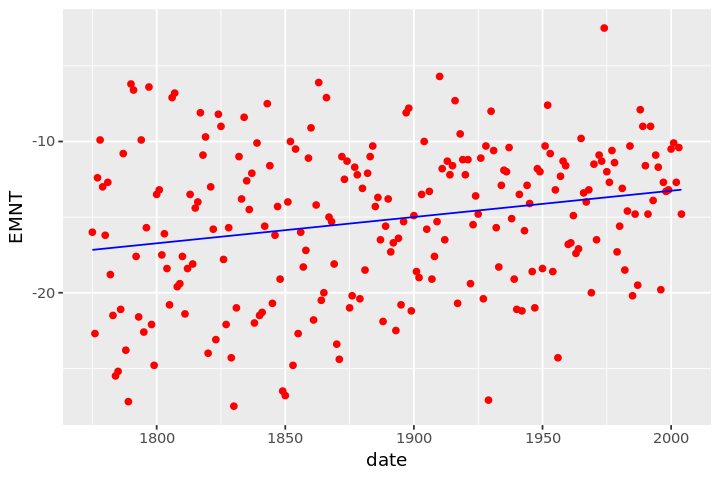

In [3]:
library("ggplot2")
options(repr.plot.height=4,repr.plot.width=6)

linearModel <- lm(data=weatherDF, formula= weatherDF$EMNT ~ weatherDF$date)
weatherDF$EMNTPredicted <- predict(linearModel, weatherDF)


ggplot(data=weatherDF, aes(x=date, y=EMNT))+
    geom_point(color="red")+
    geom_line(aes(y=EMNTPredicted),color="blue")

summary(linearModel)

In [12]:
paste0("Cada año, de media, la temperatura mínima aumenta  ", round(linearModel$coefficients[2], 4))

[1] "Cada año, de media, la temperatura mínima aumenta  0.0174"

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

[1] "La media del primer intervalo  -16.935"

[1] "La media del segundo intervalo  -13.04"

[1] "Se comprueba que las varianzas son distintas. Primer intervalo: 42.3866052631579. Segundo Intervalo: 12.5593684210526"

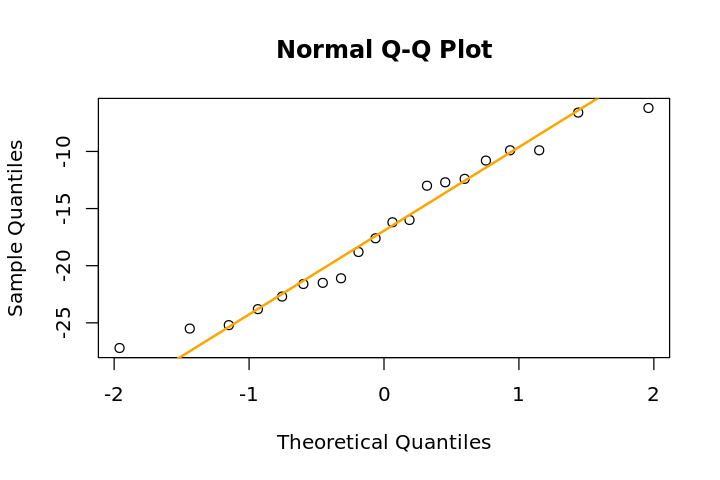

In [21]:
values <- c("date", "EMNT")
firstInterval <- weatherDF[ weatherDF$date >= 1775 & weatherDF$date <= 1794, values]
lastInterval <-  weatherDF[ weatherDF$date >= 1985 & weatherDF$date <= 2004, values]

firstIntervalMean <- mean(firstInterval$EMNT)
lastIntervalMean <- mean(lastInterval$EMNT)
paste0("La media del primer intervalo  ", firstIntervalMean)
paste0("La media del segundo intervalo  ", lastIntervalMean)


firstIntervalVar <- var(firstInterval$EMNT)
lastIntervalVar <- var(lastInterval$EMNT)

paste0("Se comprueba que las varianzas son distintas. Primer intervalo: ", firstIntervalVar, ". Segundo Intervalo: ", lastIntervalVar)


qqnorm(firstInterval$EMNT)
qqline(firstInterval$EMNT, col = 'orange', lwd = 2)

qqnorm(lastInterval$EMNT)
qqline(lastInterval$EMNT, col = 'orange', lwd = 2)



No se puede asumir que las dos poblaciones de datos tienen la misma varianza, pero podemos indicar que siguen una distribución normal, se puede determinar si siguen la misma media empleando el **t-test de Welch**

In [23]:
t.test(firstInterval$EMNT,lastInterval$EMNT)


	Welch Two Sample t-test

data:  firstInterval$EMNT and lastInterval$EMNT
t = -2.3499, df = 29.351, p-value = 0.02571
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.2832043 -0.5067957
sample estimates:
mean of x mean of y 
  -16.935   -13.040 


En este caso esl p-valor es realmente bajo, así que podemos rechazar la hipótesis nula y asumir que ambas medias no son iguales.

## Datos banco mundial

Carga los datos del banco mundial

In [25]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [27]:
databankDF = data.frame(
    Country.Name=databank$Country.Name,
    Country.Code=databank$Country.Code, 
    Indicator.Code=databank$Indicator.Code, 
    X1970=databank[c("1970")], 
    X2012=databank[c("2012")]
)

co2DF = databankDF[databankDF$Indicator.Code == "EN.ATM.GHGT.KT.CE" & databankDF$Country.Code %in% realCountryData$Country.Code, ]

paste0(co2DF[which.max(co2DF$X1970), c("Country.Name")], " fue el país que mas toneladas de CO2 emitió en 1970")



[1] "United States fue el país que mas toneladas de CO2 emitió en 1970"

¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [28]:
sortedCo2DF <- co2DF[order(-co2DF$X2012), ]
sortedCo2DF[1:5, c("Country.Name", "Country.Code", "X2012")]

Country.Name       Country.Code X2012   
3079  China              CHN          12454711
19959 United States      USA           6343841
8599  India              IND           3002895
2199  Brazil             BRA           2989418
16039 Russian Federation RUS           2803398

¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [31]:
years <- paste0("", c(2000: 2012))

co2CHNDF <- databank[databank$Indicator.Code == "EN.ATM.GHGT.KT.CE" & databank$Country.Code == "CHN", ]

values <- unlist(co2CHNDF[years], use.names=FALSE)

initialAmount <- values[1]

ratio <- c(NA,values[2:length(values)]/values[1:length(values)-1])
rate <- (ratio-1)*100

cleanedRate <- na.omit(rate)

geoMean <- exp(mean(log(cleanedRate)))

paste0("La media de porcentaje de crecimiento de China: ",  geoMean)


[1] "La media de porcentaje de crecimiento de China: 6.65836731034973"

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

Warning message:
“Removed 137 rows containing non-finite values (stat_boxplot).”

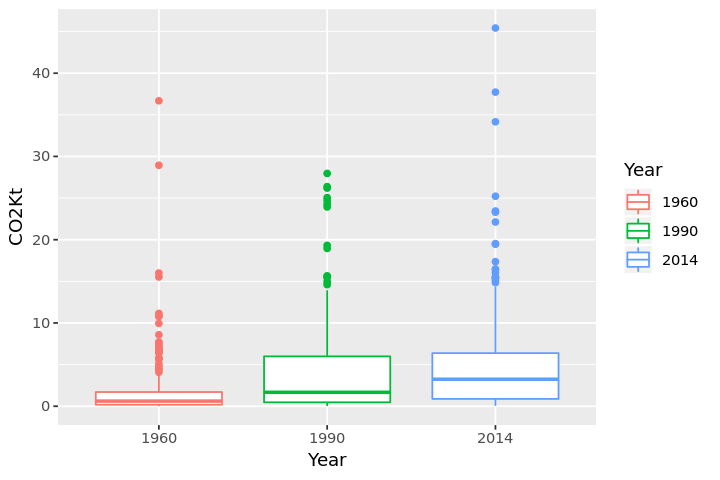

In [39]:
library(reshape2)
years <- c("1960", "1990", "2014")

databankDF <- databank[databank$Indicator.Code == "EN.ATM.CO2E.PC", c("Country.Code", years)]
CO2Kt <- melt(databankDF, id = c("Country.Code"))
colnames(CO2Kt) <- c("Country.Code", "Year", "CO2Kt")


ggplot(data=CO2Kt,aes(x=Year, y=CO2Kt,color=Year))+geom_boxplot()

In [40]:
ggplot(data=CO2Kt, aes(x=CO2Kt, fill=Year))+
   geom_histogram(bins=10, color="black", position="dodge")+
   xlab("CO2(kt) per cápita")

Warning message:
“Removed 137 rows containing non-finite values (stat_bin).”

Warning message:
“Removed 137 rows containing non-finite values (stat_density).”

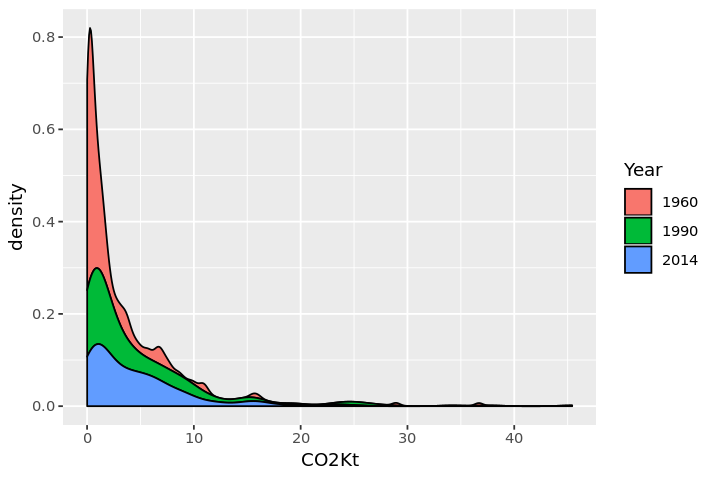

In [41]:

ggplot(CO2Kt, aes(CO2Kt, fill = Year)) +
  geom_density(position = "stack")

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2 (clave en Indicator.Code: EN.ATM.CO2E.KT) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

Warning message:
“Removed 20 rows containing missing values (geom_path).”

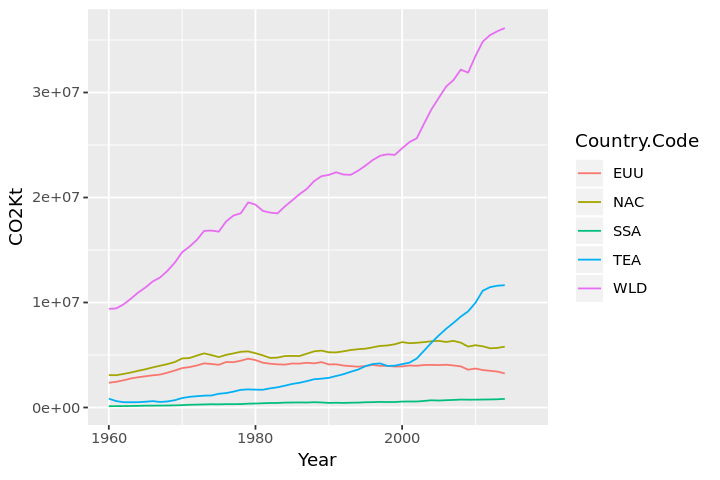

In [47]:
codes = c("WLD", "EUU", "SSA", "NAC", "TEA")

removedColumns = c("Country.Name", "Indicator.Name", "Indicator.Code")
databankDF <- databank[databank$Indicator.Code == "EN.ATM.CO2E.KT" & databank$Country.Code %in% codes,!(colnames(databank) %in% removedColumns)]

CO2Kt <- melt(databankDF, id = c("Country.Code"))

CO2Kt$variable <- as.numeric(as.character(CO2Kt$variable))

colnames(CO2Kt) <- c("Country.Code", "Year", "CO2Kt")

ggplot(data=CO2Kt, aes(x=Year, y=CO2Kt, color=Country.Code)) +
      geom_line()

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

In [59]:
library(reshape2)
library("ggplot2")
codes = c("WLD", "EUU", "SSA", "NAC", "TEA")
removedColumns = c("Country.Name", "Indicator.Name", "Indicator.Code")

databankDF <- databank[databank$Indicator.Code == "EN.ATM.CO2E.KT" & databank$Country.Code == "WLD", !(colnames(databank) %in% removedColumns) ]

CO2Kt <- melt(databankDF, id = c("Country.Code"))
CO2Kt$variable <- as.numeric(as.character(CO2Kt$variable))

colnames(CO2Kt) <- c("Country.Code", "Year", "CO2Kt")

model <- lm(data=CO2Kt, formula=CO2Kt~Year)
model3 <- lm(data=CO2Kt, formula=CO2Kt~Year+I(Year^2)+I(Year^3))
model10 <- lm(data=CO2Kt, formula=CO2Kt~Year+I(Year^2)+I(Year^3)+I(Year^4)+I(Year^5)+I(Year^6)+I(Year^7)+I(Year^8)+I(Year^9)+I(Year^10))

CO2Kt$predicted <- predict(model, CO2Kt)
CO2Kt$predicted3 <- predict(model3, CO2Kt)
CO2Kt$predicted10 <- predict(model10, CO2Kt)

ggplot(data=CO2Kt,aes(x=Year))+
   geom_point(aes(y=CO2Kt))+
   geom_line(aes(y=predicted),color="blue")+
   geom_line(aes(y=predicted3),color="green")+
   geom_line(aes(y=predicted10),color="red")

beta<-model$coefficients
beta3 <- model3$coefficients
beta10 <- model10$coefficients

prediction <- beta[1] + 2020 * beta[2]
prediction3 <- beta3[1]  + (2020 * beta3[2]) + (2020^2 * beta3[3]) + (2020^3 * beta3[4])
prediction10 <- beta10[1] + (2020 * beta10[2]) + (2020^2 * beta10[3]) + (2020^3 * beta10[4]) + (2020^8 * beta10[9])

paste0("Predicción año 2020, polinomio grado 1: ",  prediction)
paste0("Predicción año 2020, polinomio grado 3: ",  prediction3)
paste0("Predicción año 2020, polinomio grado 8: ",  prediction10)

Warning message in predict.lm(model10, CO2Kt):
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

[1] "Predicción año 2020, polinomio grado 1: 36077322.7068896"

[1] "Predicción año 2020, polinomio grado 3: 45926323.7612305"

[1] "Predicción año 2020, polinomio grado 8: 46685690.2307739"

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [61]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

Warning message:
“Removed 3 rows containing missing values (geom_point).”

[1] "La correlación de las variables CO2Kt, Co2ppm es: 0.98"

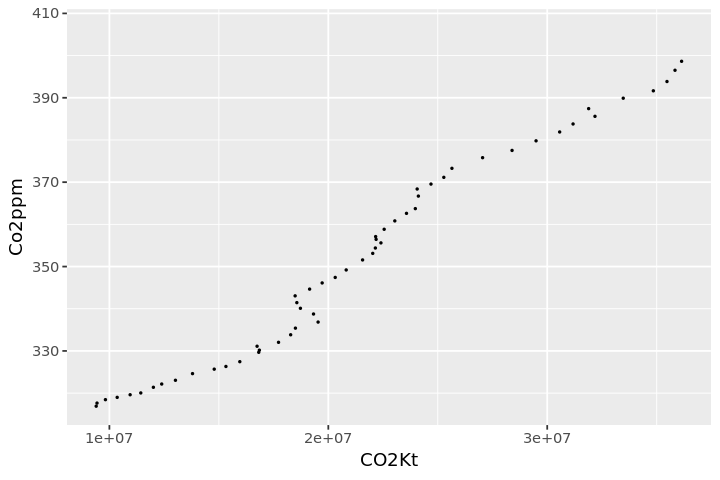

In [70]:
# Agregamos y calculamos el nivel de CO2 medio anual
yearlyco2ppm<-aggregate(interpolated ~ year, data = co2ppm, mean)

years <- c(1960: 2017)
column_years <- as.character(years)
removedColumns = c("Country.Name", "Indicator.Name", "Indicator.Code")

databankDF <- databank[databank$Indicator.Code == "EN.ATM.CO2E.KT" & databank$Country.Code == "WLD", c("Country.Code", column_years) ]

o2ppmDF = data.frame(yearlyco2ppm)

filteredO2ppmDF <- o2ppmDF[o2ppmDF$year %in% years, ]

CO2Kt <- melt(databankDF, id = c("Country.Code"))
CO2Kt$interpolates <- filteredO2ppmDF$interpolated
colnames(CO2Kt) <- c("Country.Code", "Year", "CO2Kt", "Co2ppm")


ggplot(data=CO2Kt,aes(x=CO2Kt,y=Co2ppm))+
    geom_point(size=0.3)  

cr<-cor(x=CO2Kt$CO2Kt, y=CO2Kt$Co2ppm,use="complete.obs")

paste("La correlación de las variables CO2Kt, Co2ppm es:",round(cr,2))

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera  ----> co2ppm$interpolated
* Emisiones totales CO2 en la atmósfera ----> EN.ATM.CO2E.KT
* Temperatura mínima en praga (columna EMNT).

In [81]:
years <- c(1960: 2004)
column_years <- as.character(years)
removedColumns = c("Country.Name", "Indicator.Name", "Indicator.Code")

databankDF <- databank[databank$Indicator.Code == "EN.ATM.CO2E.KT" & databank$Country.Code == "WLD", c("Country.Code", column_years) ]

o2ppmDF = data.frame(yearlyco2ppm)
filteredO2ppmDF <- o2ppmDF[o2ppmDF$year %in% years, ]

CO2Kt <- melt(databankDF, id = c("Country.Code"))
CO2Kt$interpolated <- filteredO2ppmDF$interpolated

minTemp <- weatherDF[weatherDF$date %in% years,]
CO2Kt$min <- minTemp$EMNT

colnames(CO2Kt) <- c("Country.Code", "Year", "CO2Kt", "Co2ppm", "minTemp")

cor(CO2Kt[3:ncol(CO2Kt)],use="complete.obs")


CO2Kt     Co2ppm    minTemp  
CO2Kt   1.0000000 0.9703198 0.2254552
Co2ppm  0.9703198 1.0000000 0.1783153
minTemp 0.2254552 0.1783153 1.0000000